# ME110 - LISTA 6

#### Carregando biblioteca

In [1]:
library(ggplot2)

## 1. É esperado que a massa muscular de uma pessoa diminua com a idade. Para estudar essa relação, uma nutricionista selecionou 18 mulheres, com idade entre 40 e 79 anos, e observou em cada uma delas a idade (X), em anos, e a massa muscular (Y ), em quilos.

In [2]:
data <- data.frame(massa_muscular=c(82, 91, 100, 68, 87, 73, 78, 80, 65, 84, 116, 76, 97, 100, 105, 77, 73, 78),
                   idade=c(71, 64, 43, 67, 56, 73, 68, 56, 76, 65, 45, 58, 45, 53, 49, 78, 73, 68))

In [3]:
head(data)

massa_muscular,idade
82,71
91,64
100,43
68,67
87,56
73,73


### <b>a)</b> Calcule para ambas as variáveis estatísticas descritivas : média, mediana, desvio-padrão, amplitude, primeiro quartil e terceiro quartil.

<b>Média, Mediana, Primeiro e Terceiro quartis:</b>

In [5]:
summary(data)

 massa_muscular       idade      
 Min.   : 65.00   Min.   :43.00  
 1st Qu.: 76.25   1st Qu.:53.75  
 Median : 81.00   Median :64.50  
 Mean   : 85.00   Mean   :61.56  
 3rd Qu.: 95.50   3rd Qu.:70.25  
 Max.   :116.00   Max.   :78.00  

<b>Desvios padrão:</b>

In [6]:
sd(data$idade)

[1] 11.26798

In [7]:
sd(data$massa_muscular)

[1] 13.82666

<b>Amplitude:</b>

In [8]:
max(data$idade) - min(data$idade)

[1] 35

In [9]:
max(data$massa_muscular) - min(data$massa_muscular)

[1] 51

### b) Faça para cada uma das variáveis um diagrama de caixa e comente sobre as respectivas distribuições amostrais.

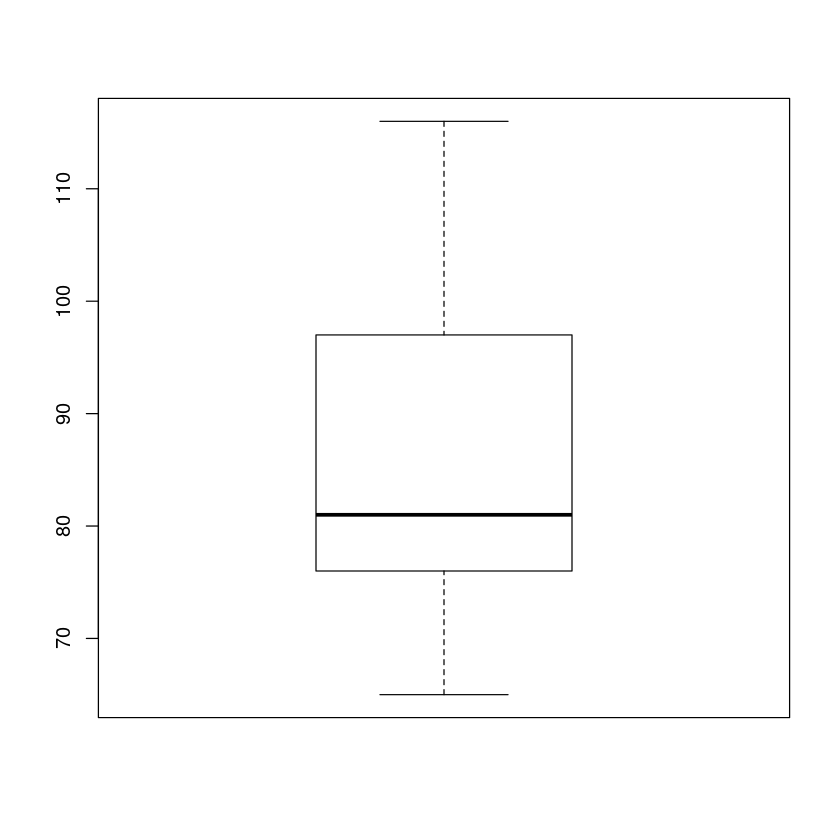

In [10]:
boxplot(data$massa_muscular)

<b>Comentário: </b> Há mais valores próximos do primeiro quartl.

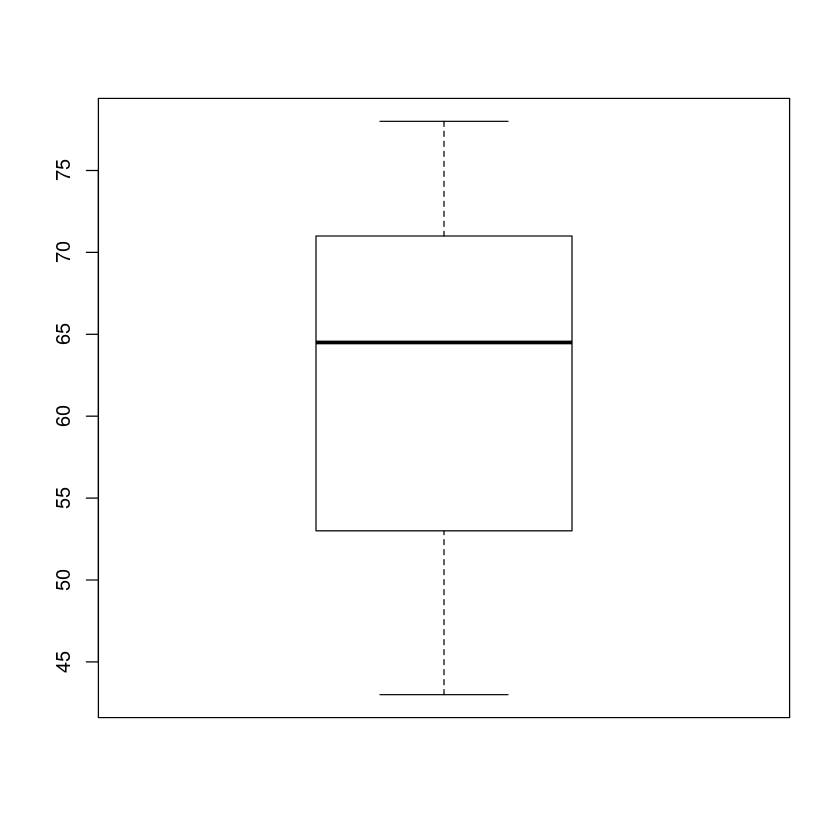

In [11]:
boxplot(data$idade)

<b>Comentário: </b> Ao contrário da outra variável, há mais valores próximos do terceiro quartl.

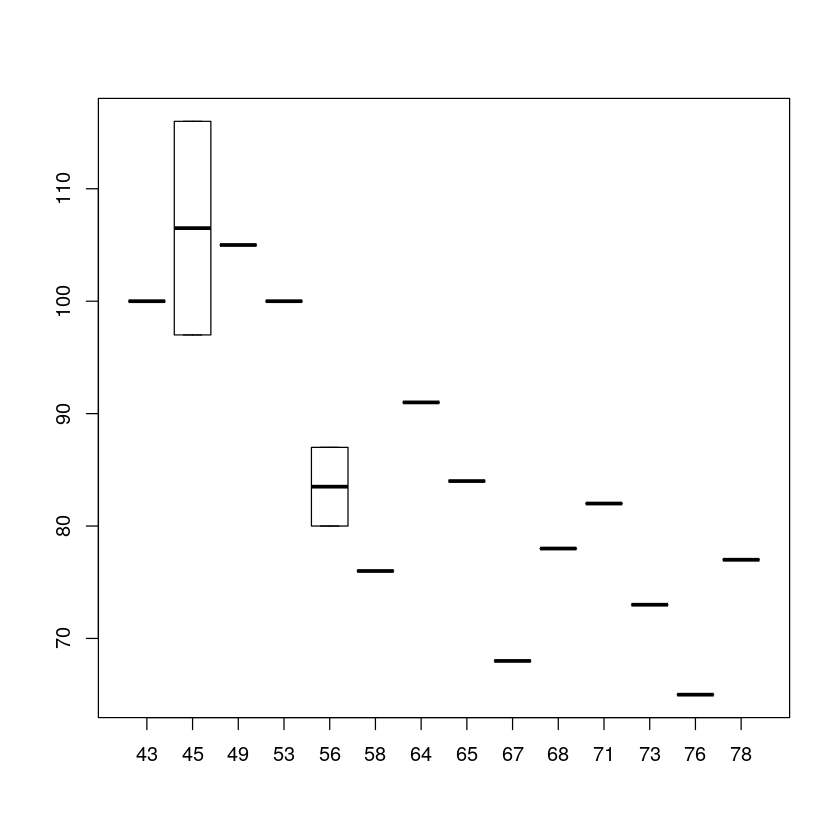

In [12]:
boxplot(data$massa_muscular ~ data$idade)

<b> Comentário: </b>
Plotei as duas juntas para visualizar melhor uma em comparação com a outra.
Temos poucos dados fora das medianas (risco central do diagrama de caixa - ou boxplot), acredito por temos poucas amostras para cada valor de idade. Apesar disso, é possível observar que pode haver uma correlação entre idade e massa muscular por pessoas com idade mais baixa ter mais alta massa muscular que pessoas com maior idade.

### c) Construa o diagrama de dispersão entre a variável idade e a variável massa muscular. Há alguma evidência de associação entre elas? Explique.

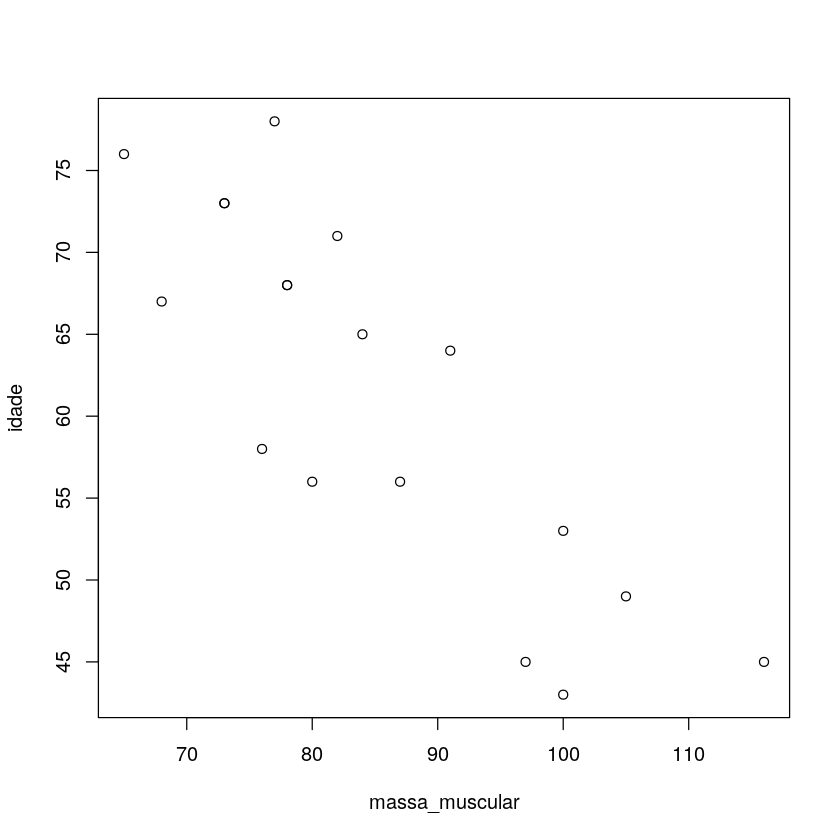

In [13]:
plot(data)

<b>Resposta:</b> Sim! Por conta dos pontos seguirem uma mesma "direção", sendo possível traçar uma reta que se aproximaria bem da maiora dos pontos, parece ter uma relação inversamente proporcional: quanto maior a idade, menor a massa muscular e vice versa.

### d) Calcule o coeficiente de correlação de Pearson e interprete.

In [14]:
?cor

In [15]:
cor(x=data$idade, y=data$massa_muscular, method='pearson')

[1] -0.8366766

<b>Resposta:</b> Essa correlação é bem alta! E, como havia sido discutida acima, é, de fato, negativa (um valor aumenta quando o outro diminui).

### e) Ajuste uma reta de regressão de mínimos quadrados para a relação entre as variáveis Y , massa muscular (dependente), e X, idade (independente). Interprete as estimativas dos parâmetros da reta.

In [16]:
?lm

In [17]:
modelo <- lm(data=data, formula=massa_muscular~idade)
modelo


Call:
lm(formula = massa_muscular ~ idade, data = data)

Coefficients:
(Intercept)        idade  
    148.197       -1.027  


In [18]:
summary(modelo)


Call:
lm(formula = massa_muscular ~ idade, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.650  -4.760  -0.317   6.576  14.003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  148.197     10.505  14.108 1.91e-10 ***
idade         -1.027      0.168  -6.111 1.50e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.806 on 16 degrees of freedom
Multiple R-squared:    0.7,	Adjusted R-squared:  0.6813 
F-statistic: 37.34 on 1 and 16 DF,  p-value: 1.504e-05


`geom_smooth()` using formula 'y ~ x'


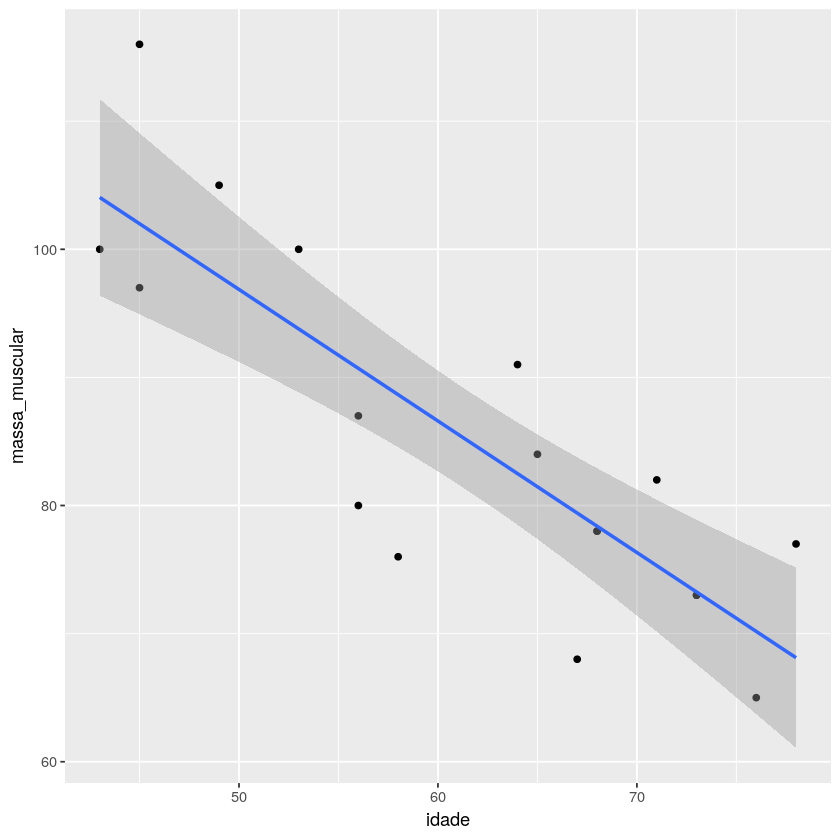

In [19]:
ggplot(data, aes(x=idade, y=massa_muscular))+geom_point()+geom_smooth(method=lm)

<b>Observações: </b>
Acima, utilizei o método lm que ajusta a reta de uma regressão linear para as varáveis y (massa_muscular) em função de x (idade). É uma função comum do tipo `f(x) = ax + b`, onde os melhores coeficientes a e b encontrados foram 148.197 e -1.027. Com a instrução `summary(model)`, conseguimos ver que o R² é relativamente alto (0.7), porém o p-value é bem baixo (1.5*10⁻⁵), dando uma maior confiança e credibilidade para a reta de regressão ajustada.

### f) Considerando a reta estimada dada no item anterior, estime a massa muscular média de mulheres com 50 anos.

In [20]:
predict(modelo, data.frame(idade=50))

1 
96.86369

## 2. Os dados a seguir correspondem à variável renda familiar e gasto com alimentação (em unidades monetárias) para uma amostra de 25 famílias.

In [21]:
data <- data.frame(renda_familiar=c(3, 5, 10, 10, 20, 20, 20, 30, 40, 50, 60, 70, 70, 80, 100, 100, 100, 120, 120, 
                                    140, 150, 180, 180, 200, 200),
                   gasto_alimentacao=c(1.5, 2, 6, 7, 10, 12, 15, 8, 10, 20, 20, 25, 30, 25, 40, 35, 40, 30, 40, 40, 
                                       50, 40, 50, 60, 50))

In [22]:
head(data)

renda_familiar,gasto_alimentacao
3,1.5
5,2.0
10,6.0
10,7.0
20,10.0
20,12.0


### a) Calcule para ambas as variáveis estatísticas descritivas : média, mediana, desvio-padrão, amplitude, primeiro quartil e terceiro quartil.

<b>Média, Mediana, Primeiro e Terceiro quartis:</b>

In [23]:
summary(data)

 renda_familiar   gasto_alimentacao
 Min.   :  3.00   Min.   : 1.50    
 1st Qu.: 20.00   1st Qu.:10.00    
 Median : 70.00   Median :25.00    
 Mean   : 83.12   Mean   :26.66    
 3rd Qu.:120.00   3rd Qu.:40.00    
 Max.   :200.00   Max.   :60.00    

<b>Desvios padrão:</b>

In [24]:
sd(data$renda_familiar)

[1] 64.29445

In [25]:
sd(data$gasto_alimentacao)

[1] 17.23654

<b>Amplitude:</b>

In [26]:
max(data$renda_familiar) - min(data$renda_familiar)

[1] 197

In [27]:
max(data$gasto_alimentacao) - min(data$gasto_alimentacao)

[1] 58.5

### b) Faça para cada uma das variáveis um diagrama de caixa e comente sobre as respectivas distribuições amostrais.

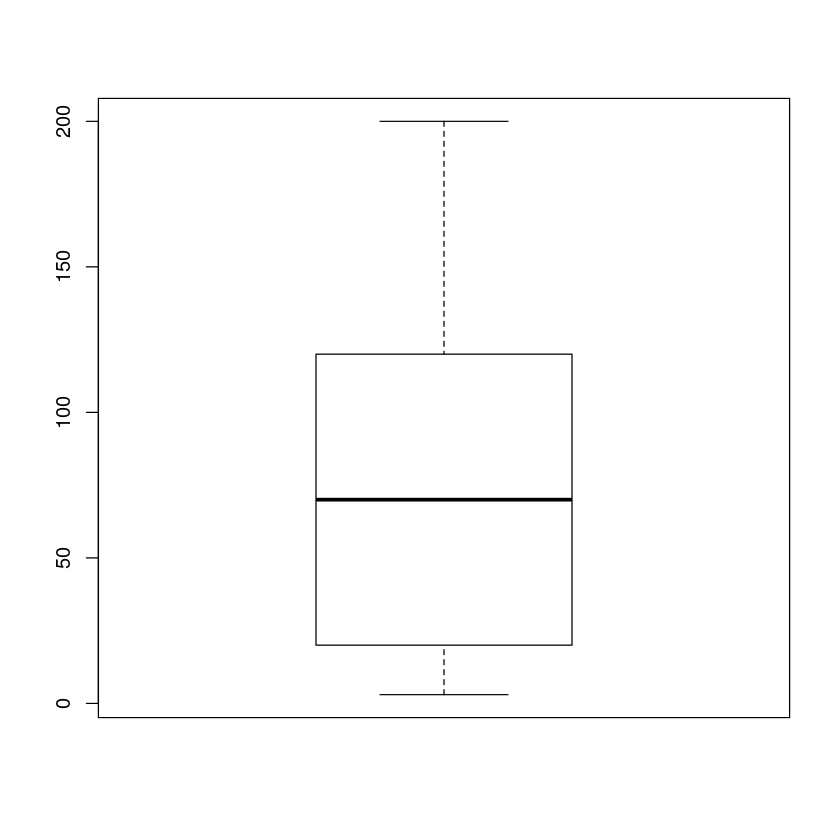

In [28]:
boxplot(data$renda_familiar)

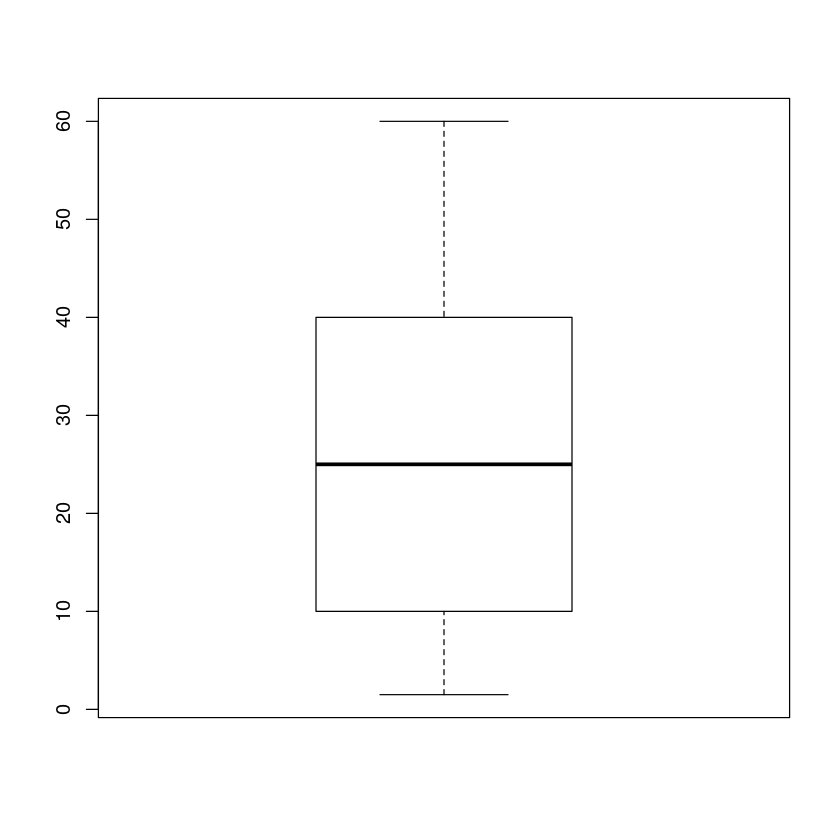

In [30]:
boxplot(data$gasto_alimentacao)

<b>Comentário: </b> Temos alguns valores máximos discrepantes tanto para renda familiar quanto para gasto com alimentação, porém os outros pontos parecem estar bem distribuidos em ambas as variáveis. Na renda familiar, por conta do desvio padrão alto e grande amplitude, temos uma caixa com uma maior distância entre o terceiro e o primeiro quartis.

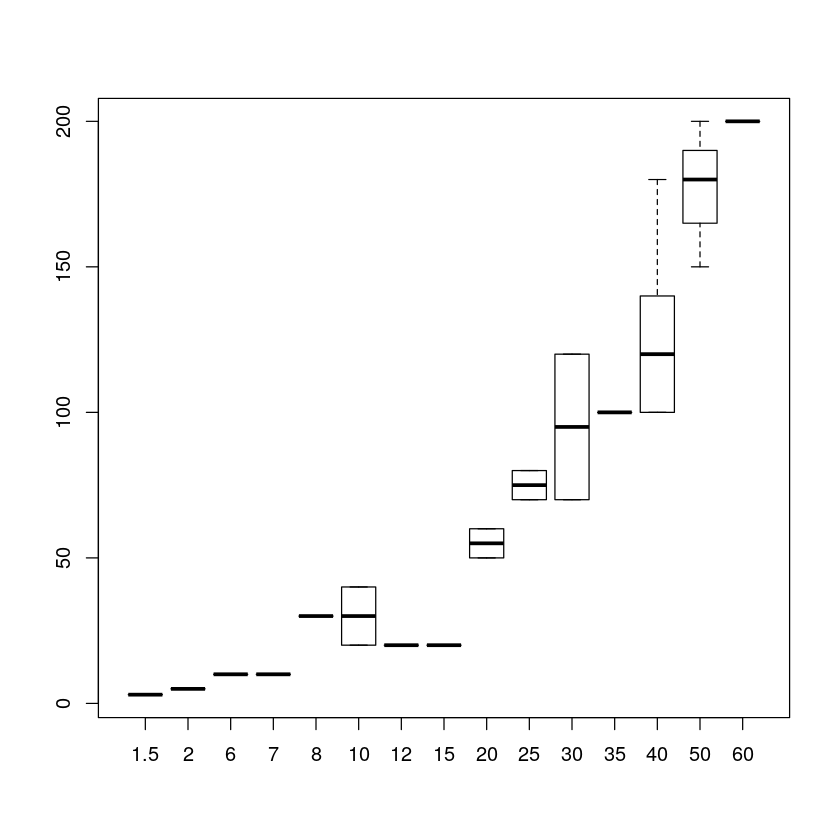

In [31]:
boxplot(data$renda_familiar ~ data$gasto_alimentacao)

<b>Comentário: </b> Parece haver uma correlação também entre ambas variáveis.

### c) Construa o diagrama de dispersão entre a variável renda familiar e a variável gasto com alimentação. Há alguma evidência de associação entre elas? Explique.

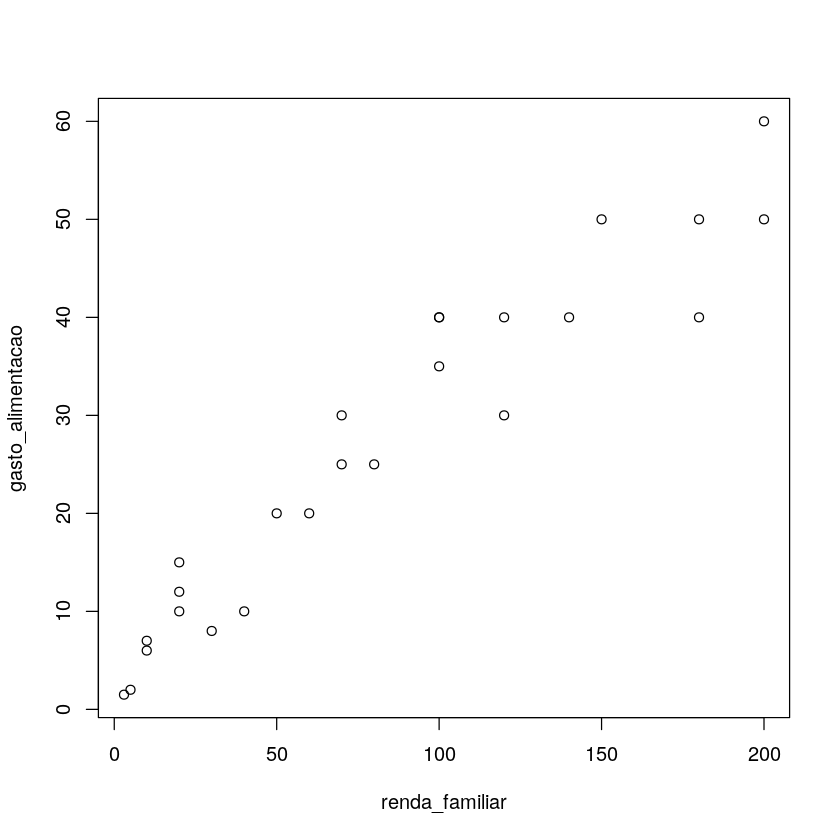

In [33]:
plot(data)

<b>Resposta:</b> Sim, há evidências de associação entre elas. Por conta dos pontos seguirem uma mesma "direção", sendo possível traçar uma reta que se aproximaria bem da maiora dos pontos, parece ter uma relação diretamente proporcional: quanto maior a renda familiar, maior o gasto das famílais com alimentação.

### d) Calcule o coeficiente de correlação de Pearson e interprete.

In [34]:
cor(x=data$renda_familiar, y=data$gasto_alimentacao, method='pearson')

[1] 0.9540509

<b>Resposta:</b> Essa correlação é muito alta! E, como havia sido discutido acima, é, de fato, positiva (um valor aumenta conforme o outro aumenta também).


### e) Ajuste uma reta de regressão de mínimos quadrados para a relação entre as variáveis Y, gasto com alimentação (dependente), e X, renda familiar (independente).

In [38]:
modelo <- lm(data=data, formula=gasto_alimentacao~renda_familiar)
modelo


Call:
lm(formula = gasto_alimentacao ~ renda_familiar, data = data)

Coefficients:
   (Intercept)  renda_familiar  
        5.4005          0.2558  


In [39]:
summary(modelo)


Call:
lm(formula = gasto_alimentacao ~ renda_familiar, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4389  -4.6678  -0.7466   3.9072   9.0226 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.40047    1.74695   3.091  0.00515 ** 
renda_familiar  0.25577    0.01675  15.270 1.57e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.276 on 23 degrees of freedom
Multiple R-squared:  0.9102,	Adjusted R-squared:  0.9063 
F-statistic: 233.2 on 1 and 23 DF,  p-value: 1.574e-13


`geom_smooth()` using formula 'y ~ x'


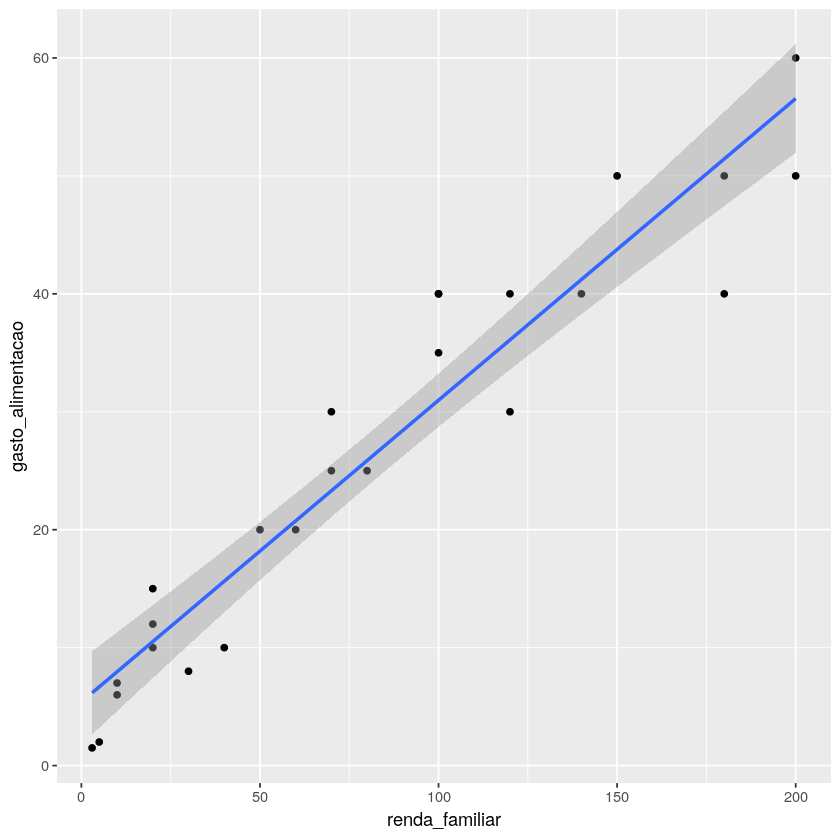

In [41]:
ggplot(data, aes(x=renda_familiar, y=gasto_alimentacao))+geom_point()+geom_smooth(method=lm)

### f) Qual o significado prático do valor da inclinação da reta de regressão do item anterior?
<b>Resposta:</b> O significado prático é que o gasto de alimentação varia positivamente com um grau de 0.2558 para cada valor de renda_familiar pertencente aos reais.

## 3. Um pesquisador deseja verifocar se um instrumento para medir a concentração de determinada substância no sangue está bem calibrado. Para isto, ele tomou 15 amostras de concentrações conhecidas (X) e determinou a respectiva concentração através do instrumento (Y ), obtendo:

In [43]:
data <- data.frame(x=c(2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8, 10, 10, 10),
                   y=c(2.1, 1.8, 1.9, 4.5, 4.2, 4, 6.2, 6, 6.5, 8.2, 7.8, 7.7, 9.6, 10, 10.1))

### a) Calcule para ambas as variáveis estatísticas descritivas : média, mediana, desvio-padrão, amplitude, primeiro quartil e terceiro quartil.

<b>Média, Mediana, Primeiro e Terceiro quartis:</b>

In [44]:
summary(data)

       x            y        
 Min.   : 2   Min.   : 1.80  
 1st Qu.: 4   1st Qu.: 4.10  
 Median : 6   Median : 6.20  
 Mean   : 6   Mean   : 6.04  
 3rd Qu.: 8   3rd Qu.: 8.00  
 Max.   :10   Max.   :10.10  

<b>Desvios padrão:</b>

In [45]:
sd(data$x)

[1] 2.9277

In [46]:
sd(data$y)

[1] 2.880427

<b>Amplitude:</b>

In [47]:
max(data$x) - min(data$x)

[1] 8

In [48]:
max(data$y) - min(data$y)

[1] 8.3

### b) Faça, em um único gráfico, um diagrama de caixa para a concentração conhecida (X) e outro para a concentração medida pelo aparelho (Y ). Comente.

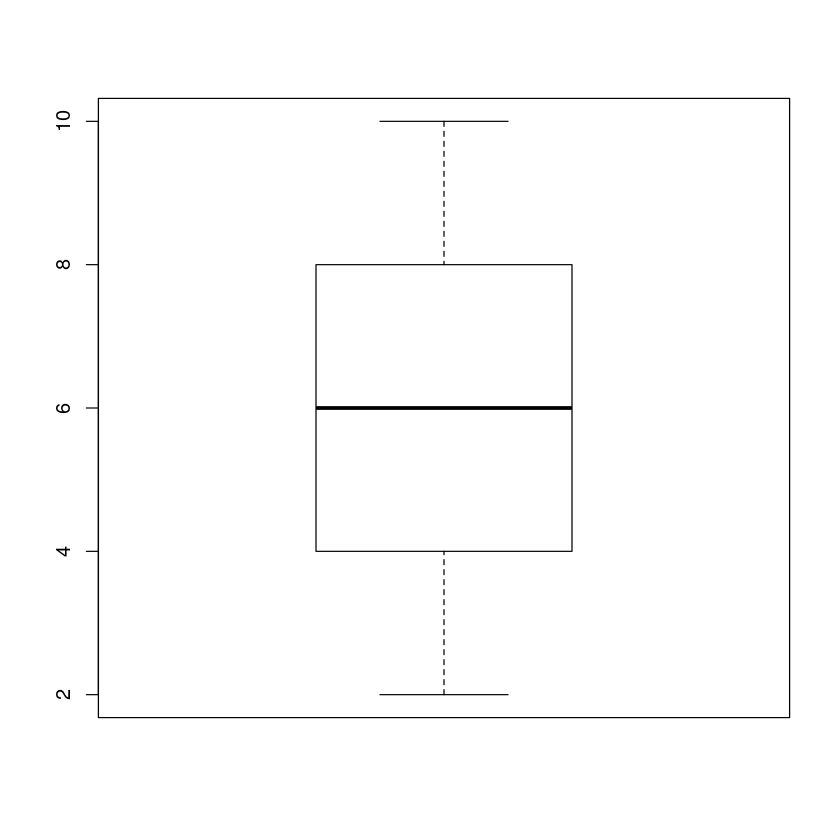

In [49]:
boxplot(data$x)

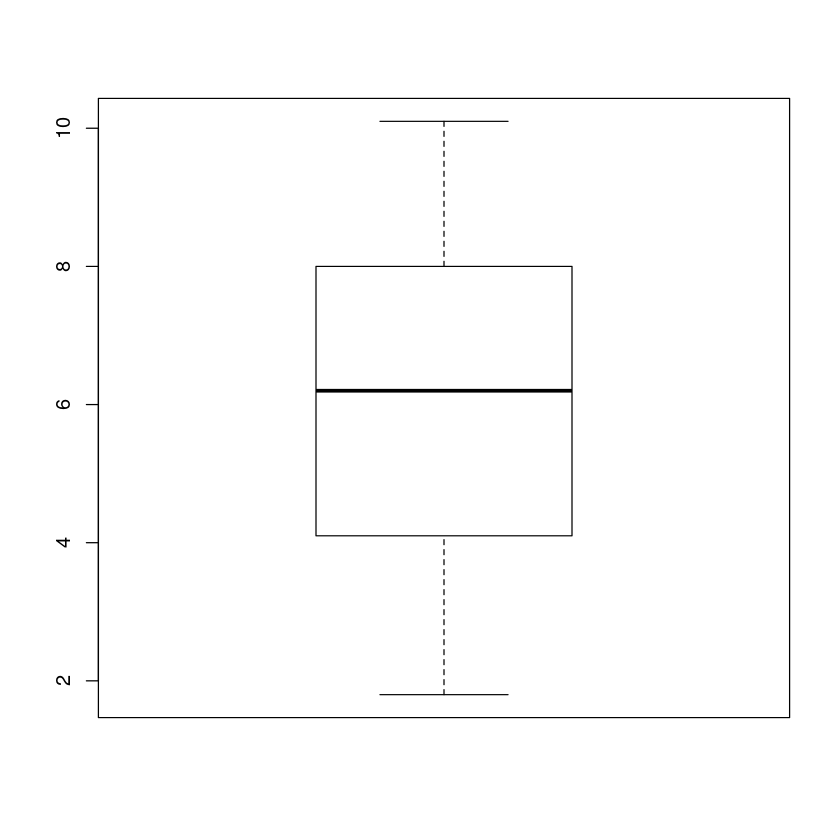

In [51]:
boxplot(data$y)

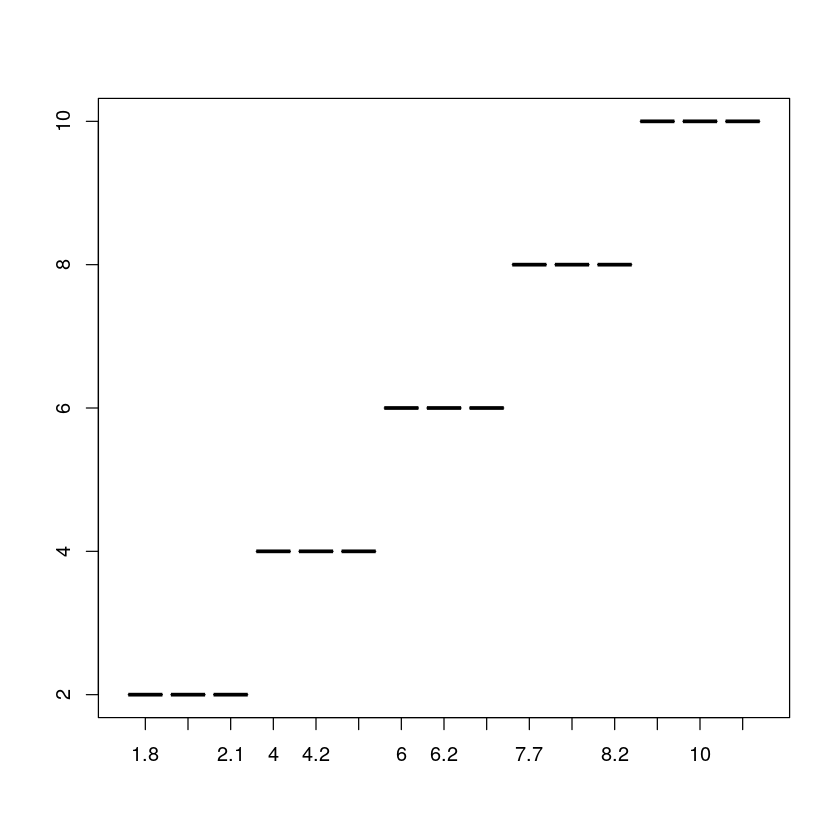

In [50]:
boxplot(data$x ~ data$y)

<b>Comentário: </b> Os valores são bem próximos, com diferença na magnitude de casas decimais.

### c) Construa o diagrama de dispersão entre as variáveis X e Y ? Comente.

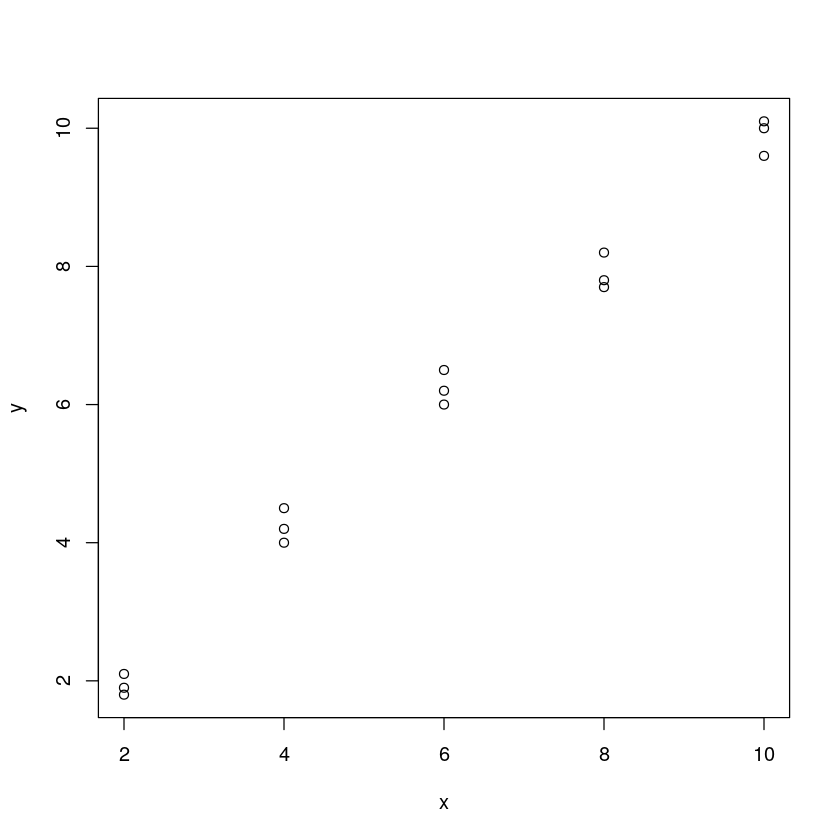

In [52]:
plot(data)

<b>Comentário:</b> Os valores das medições de x e y, apesar de próximos, têm diferenças sutis.

### d) Calcule o coeficiente de correlação de Pearson e interprete.

In [53]:
cor(x=data$x, y=data$y, method='pearson')

[1] 0.9960838

<b>Resposta:</b> Essa correlação é altíssima! Como havia sido discutido acima, os valores são bem próximos, porém levemente diferentes.

### e) Ajuste uma reta de regressão de mínimos quadrados para a relação entre as variáveis Y , concentração mensurada no aparelho (dependente), e X, concentração conhecida (independente).

In [54]:
modelo <- lm(data=data, formula=y~x)
modelo


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
       0.16         0.98  


In [55]:
summary(modelo)


Call:
lm(formula = y ~ x, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -0.36  -0.21  -0.02   0.15   0.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.16000    0.16003    1.00    0.336    
x            0.98000    0.02413   40.62 4.39e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2643 on 13 degrees of freedom
Multiple R-squared:  0.9922,	Adjusted R-squared:  0.9916 
F-statistic:  1650 on 1 and 13 DF,  p-value: 4.394e-15


`geom_smooth()` using formula 'y ~ x'


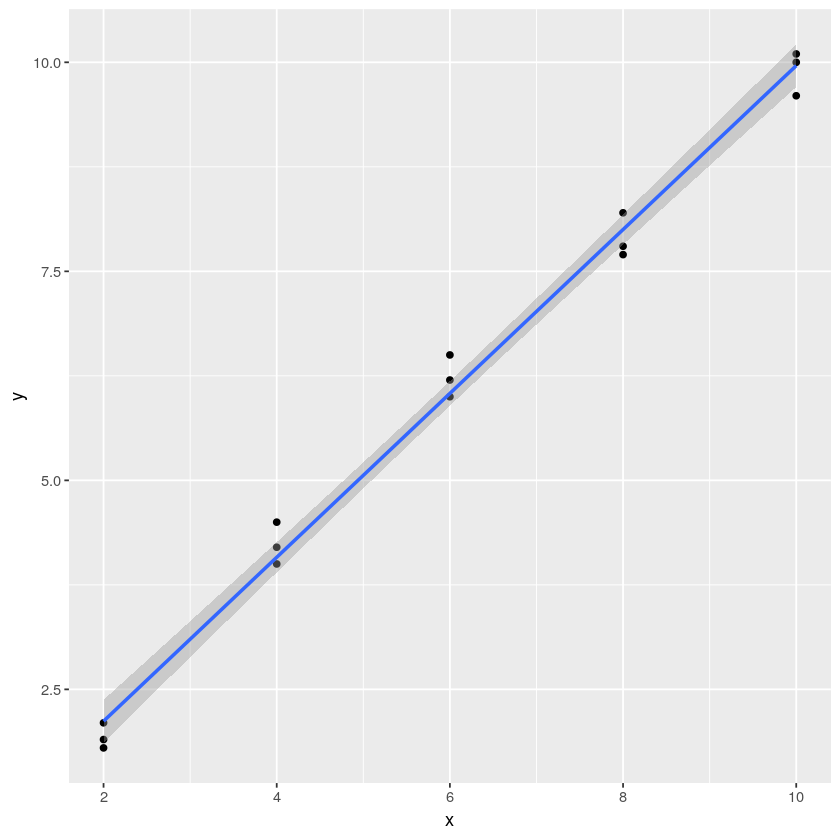

In [57]:
ggplot(data, aes(x=x, y=y))+geom_point()+geom_smooth(method=lm)

### f) Com base nos itens anteriores tire conclusões sobre a eficiência do instrumento. Há evidências de que o instrumento esteja descalibrado?
<b>Resposta: </b> O instrumento parece bem eficiente por apresentar medições com valores bem próximos dos esperados. Porém sim, ele apresenta evidências de que esteja descalibrado, que podem ser observadas com a correlação super alta, porém ainda menor que 1 e com os gráficos mostrando a proximidade dos valores das medições.